# Length Scale Update

Using length-scale=3 the plots look like the following

<p style="color:red">
The Y-axis labels are in error. <br>
<br>
For the H-band it should just be $I \backslash I_e$<br>
For Non H-Band it should be $I \backslash I_e(h)$ normalized by $I_{min}(R)$<br>

</p>

### H

![h_fit](h_fit.png)
![h_sample](h_sample.png)

### J

![j_fit](./length_scales/j-3.0.png)
![j_sample](./length_scales/j-3.0-samples.png)

### V

![v_fit](./length_scales/v-3.0.png)
![v_sample](./length_scales/v-3.0-samples.png)

### Z

![z_fit](./length_scales/z-3.0.png)
![z_sample](./length_scales/z-3.0-samples.png)

In [1]:
from __future__ import division, print_function

# adds parent dir to python path
import sys
sys.path.insert(0, '..')

import json

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import gphelper as gp
import DataTools as dt

In [68]:
import importlib
importlib.reload(gp)

with open('./gp-models/band_ratio_scales.json', 'r') as f:
    band_scales = json.load(f)
    band_scales = {b:dt._nmpy_decode(band_scales[b]) for b in band_scales.keys()}


h_model = gp.GPHelper(restore_file='./gp-models/gp_h.json')
x = np.linspace(0.001, 5, 500)[:, np.newaxis]
h_line = h_model.sample(x)

idx = np.random.randint(0, len(band_scales['j']))
j_model = gp.GPHelper(restore_file='./gp-models/gp_j.json')
j_line = j_model.sample(x, monotonic=False)
j_scale = band_scales['j'][idx]

v_model = gp.GPHelper(restore_file='./gp-models/gp_v.json')
v_line = v_model.sample(x, monotonic=False)
v_scale = band_scales['v'][idx]

z_model = gp.GPHelper(restore_file='./gp-models/gp_z.json')
z_line = z_model.sample(x, monotonic=False)
z_scale = band_scales['z'][idx]

/home/ryanhausen/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:339: RuntimeWarning: covariance is not positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T


J:14.967392073377075, V:31.91705610652851, Z:21.45218065005192


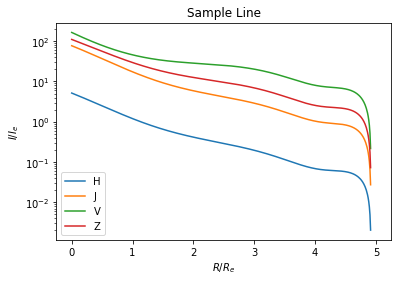

In [69]:
print(f'J:{j_scale}, V:{v_scale}, Z:{z_scale}')
plt.title('Sample Line')
plt.ylabel('$I/I_e$')
plt.xlabel('$R/R_e$')
plt.semilogy(x, h_line, label='H')
plt.semilogy(x, h_line*j_line*j_scale, label='J')
plt.semilogy(x, h_line*v_line*v_scale, label='V')
plt.semilogy(x, h_line*z_line*z_scale, label='Z')
plt.legend()

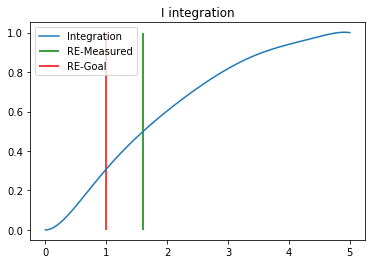

In [70]:
# check H for correct profile
xs = [x[0]**2 * np.pi]
xs.extend([np.pi*(r2**2-r1**2) for r1, r2 in zip(x[:-1], x[1:])])
xs = np.array(xs)

rad_h = xs*h_line
I_tot = (rad_h).sum()
int_I = np.cumsum(rad_h/I_tot)
re_idx = np.square(int_I-0.5).argmin()
re = x[re_idx]

plt.title('I integration')
plt.plot(x, int_I, label='Integration')
plt.vlines(re, 0, 1, color='g', label='RE-Measured')
plt.vlines(1, 0, 1, color='r', label='RE-Goal')
plt.legend()
plt.show()

/home/ryanhausen/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:339: RuntimeWarning: covariance is not positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T


(100, 500, 1)es.    


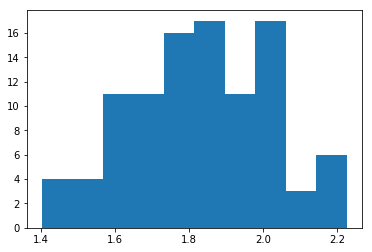

In [85]:
# Try drawing a bunch of samples and see where they land

def get_re(h_sample):
    rad_h = xs*h_sample
    I_tot = (rad_h).sum()
    int_I = np.cumsum(rad_h/I_tot)
    re_idx = np.square(int_I-0.5).argmin()
    re = x[re_idx]    
    return re

samples = h_model.sample(x, num_samples=100)

res = []
for i in range(samples.shape[0]):
    re = get_re(samples[i,:,:])
    res.append(re[0])

plt.hist(res)
plt.show()